In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from dash import Dash
import json
from wordcloud import WordCloud, STOPWORDS
from dash import Dash, dcc, Output, Input  # pip install dash
import dash_bootstrap_components as dbc    # pip install dash-bootstrap-components

In [2]:
df_movies = pd.read_csv('datasets/MovieLens/movies.csv')

print("Archivo cargado correctamente")

Archivo cargado correctamente


In [3]:
df_ratings = pd.read_csv('datasets/MovieLens/ratings.csv')

print("Archivo cargado correctamente")

Archivo cargado correctamente


In [4]:
df_movies.set_index('movieId', inplace=True)

df_movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
df_ratings.drop('timestamp', axis=1, inplace=True)

df_ratings.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [6]:
df_prom_ratings = df_ratings.groupby('movieId')['rating'].mean().reset_index()

df_prom_ratings.sort_values(by='rating', ascending=False, axis=0, inplace=True)

df_prom_ratings

,movieId,rating
29523,136782,5.0
49654,186119,5.0
29643,137032,5.0
49041,184643,5.0
29646,137038,5.0
...,...,...
5693,5805,0.5
55757,199922,0.5
53387,194608,0.5
58517,207153,0.5


In [7]:
df_movies_rating = df_movies.merge(df_prom_ratings, on='movieId')
df_movies_rating.sort_values(by='rating', ascending=False, axis=0, inplace=True)
df_movies_rating.head()

,movieId,title,genres,rating
29523,136782,The Girl is in Trouble (2015),Thriller,5.0
49654,186119,A Gift Horse (2015),Children,5.0
29643,137032,The Perfect Neighbor (2005),Drama|Thriller,5.0
49041,184643,Relentless (2018),Thriller,5.0
29646,137038,The Perfect Wife (2001),Drama|Thriller,5.0


In [8]:
num_votos = df_ratings['movieId'].value_counts().reset_index()

df_movies_rating_final = df_movies_rating.merge(num_votos, on='movieId')
df_movies_rating_final.sort_values(by='count', ascending=False, axis=0, inplace=True)

df_movies_rating_final.head()

,movieId,title,genres,rating,count
2566,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,81491
1532,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,81482
2038,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,79672
2209,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151342,74127
2201,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099,72674


In [9]:
df_movies_rating_filtered = df_movies_rating_final.loc[df_movies_rating_final['count'] >= 6000]
df_movies_rating_filtered.sort_values(by='rating', ascending=False, axis=0, inplace=True)

df_movies_rating_filtered.drop(['genres'], axis=1, inplace=True)



df_movies_rating_filtered.head()

C:\Users\mvill\AppData\Local\Temp\ipykernel_23120\1283463326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_rating_filtered.sort_values(by='rating', ascending=False, axis=0, inplace=True)
C:\Users\mvill\AppData\Local\Temp\ipykernel_23120\1283463326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_rating_filtered.drop(['genres'], axis=1, inplace=True)


,movieId,title,rating,count
1532,318,"Shawshank Redemption, The (1994)",4.413576,81482
1633,858,"Godfather, The (1972)",4.324336,52498
1648,50,"Usual Suspects, The (1995)",4.284353,55366
1652,1221,"Godfather: Part II, The (1974)",4.261759,34188
1655,2019,Seven Samurai (Shichinin no samurai) (1954),4.254769,13367


In [10]:
df_movies_metadata = pd.read_csv('datasets/IMBD/movies_metadata.csv',
                             low_memory=False)

print("Archivo cargado correctamente")

Archivo cargado correctamente


In [11]:
df_movies_meta = df_movies_metadata

# Eliminar fila con id 1997-08-20

df_movies_meta.drop(df_movies_meta[df_movies_meta['id'].astype(str).str.contains('-')].index, inplace=True)

df_movies_meta['id'] = df_movies_meta['id'].astype(int)

In [12]:
df_links = pd.read_csv('datasets/IMBD/links.csv')

print("Archivo cargado correctamente")

Archivo cargado correctamente


In [13]:
df_links = df_links[['movieId', 'tmdbId']]

# Cambia el nombre del a segunda columna para que coincida con el df_movies_meta
df_links.rename(columns={'tmdbId': 'id'}, inplace=True)

df_links.dropna(inplace=True)

df_links['id'] = df_links['id'].astype('int')

df_links.head()


,movieId,id
0,1,862
1,2,8844
2,3,15602
3,4,31357
4,5,11862


In [14]:
# Concatena los df de links y movies_meta usando Concat
df_movies_meta_link = pd.merge(df_movies_meta, df_links, on='id')

In [15]:
# Une el df filtrado y el df de movies_meta usando merge
# Ocupar este dataframe para crear otros dataframes
df_final_usable = df_movies_rating_filtered.merge(df_movies_meta_link, on='movieId')

df_final_usable.head()

,movieId,title_x,rating,count,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,video,vote_average,vote_count
0,318,"Shawshank Redemption, The (1994)",4.413576,81482,False,NaN,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,278,...,1994-09-23,28341469.0,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,False,8.5,8358.0
1,858,"Godfather, The (1972)",4.324336,52498,False,"{'id': 230, 'name': 'The Godfather Collection'...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.thegodfather.com/,238,...,1972-03-14,245066411.0,175.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An offer you can't refuse.,The Godfather,False,8.5,6024.0
2,50,"Usual Suspects, The (1995)",4.284353,55366,False,NaN,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.mgm.com/#/our-titles/2083/The-Usual...,629,...,1995-07-19,23341568.0,106.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,Five Criminals. One Line Up. No Coincidence.,The Usual Suspects,False,8.1,3334.0
3,1221,"Godfather: Part II, The (1974)",4.261759,34188,False,"{'id': 230, 'name': 'The Godfather Collection'...",13000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,240,...,1974-12-20,47542841.0,200.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,False,8.3,3418.0
4,2019,Seven Samurai (Shichinin no samurai) (1954),4.254769,13367,False,NaN,2000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,346,...,1954-04-26,271841.0,207.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,The Mighty Warriors Who Became the Seven Natio...,Seven Samurai,False,8.2,892.0


In [16]:
df_final = df_final_usable[['movieId', 'title_y', 'rating', 'count', 'budget', 'revenue', 'release_date']]

df_final.rename(columns={'title_y': 'title'}, inplace=True)

C:\Users\mvill\AppData\Local\Temp\ipykernel_23120\1209811455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.rename(columns={'title_y': 'title'}, inplace=True)


In [17]:
df_final.head(50)

,movieId,title,rating,count,budget,revenue,release_date
0,318,The Shawshank Redemption,4.413576,81482,25000000,2.834147e+07,1994-09-23
1,858,The Godfather,4.324336,52498,6000000,2.450664e+08,1972-03-14
2,50,The Usual Suspects,4.284353,55366,6000000,2.334157e+07,1995-07-19
3,1221,The Godfather: Part II,4.261759,34188,13000000,4.754284e+07,1974-12-20
4,2019,Seven Samurai,4.254769,13367,2000000,2.718410e+05,1954-04-26
5,527,Schindler's List,4.247579,60411,22000000,3.213656e+08,1993-11-29
6,1203,12 Angry Men,4.243014,16569,350000,1.000000e+06,1957-03-25
7,904,Rear Window,4.237948,20162,1000000,3.676431e+07,1954-08-01
8,2959,Fight Club,4.228311,58773,63000000,1.008538e+08,1999-10-15
9,1193,One Flew Over the Cuckoo's Nest,4.218662,36058,3000000,1.089813e+08,1975-11-18


In [18]:
# Convertir la columna 'release_date' a tipo de dato datetime
df_final['release_date'] = pd.to_datetime(df_final['release_date'], format='%Y-%m-%d')

df_final['budget'] = pd.to_numeric(df_final['budget'], errors='coerce')

df_final['revenue'] = pd.to_numeric(df_final['revenue'], errors='coerce')

df_final.head(50)

C:\Users\mvill\AppData\Local\Temp\ipykernel_23120\808503251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['release_date'] = pd.to_datetime(df_final['release_date'], format='%Y-%m-%d')
C:\Users\mvill\AppData\Local\Temp\ipykernel_23120\808503251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['budget'] = pd.to_numeric(df_final['budget'], errors='coerce')
C:\Users\mvill\AppData\Local\Temp\ipykernel_23120\808503251.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,movieId,title,rating,count,budget,revenue,release_date
0,318,The Shawshank Redemption,4.413576,81482,25000000,2.834147e+07,1994-09-23
1,858,The Godfather,4.324336,52498,6000000,2.450664e+08,1972-03-14
2,50,The Usual Suspects,4.284353,55366,6000000,2.334157e+07,1995-07-19
3,1221,The Godfather: Part II,4.261759,34188,13000000,4.754284e+07,1974-12-20
4,2019,Seven Samurai,4.254769,13367,2000000,2.718410e+05,1954-04-26
5,527,Schindler's List,4.247579,60411,22000000,3.213656e+08,1993-11-29
6,1203,12 Angry Men,4.243014,16569,350000,1.000000e+06,1957-03-25
7,904,Rear Window,4.237948,20162,1000000,3.676431e+07,1954-08-01
8,2959,Fight Club,4.228311,58773,63000000,1.008538e+08,1999-10-15
9,1193,One Flew Over the Cuckoo's Nest,4.218662,36058,3000000,1.089813e+08,1975-11-18


In [19]:
df_votes_count = df_final.sort_values(by='count', ascending=False, axis=0)

px.bar(df_votes_count.head(10).sort_values(by='count', ascending=True),
       x='count',
       y='title',
       title='Top 10 Películas por numero de votos',
       labels={'title': 'Título', 'count': 'Número de votos'},
       orientation='h',
       range_x=[55000, 85000])

In [20]:
df_rating = df_final.sort_values(by='rating', ascending=False, axis=0)

px.bar(df_rating.head(10).sort_values(by='rating', ascending=True),
       x='rating',
       y='title',
       title='Top 10 Películas por valoracion',
       labels={'title': 'Título', 'rating': 'Valoracion'},
       orientation='h',
       range_x=[4.0, 4.5])

In [21]:
df_country = df_final_usable[['movieId', 'title_y','production_countries']]

df_country.head()

# Replace all single quotes with double quotes in the production_countries column
df_country['production_countries'] = df_country['production_countries'].str.replace("'", '"')

# Convert the production_countries column to a list of dictionaries
df_country['production_countries'] = df_country['production_countries'].apply(lambda x: json.loads(x) if x != '[]' else [])

# Extract the name of the country from the list of dictionaries
df_country['production_countries'] = df_country['production_countries'].apply(lambda x: x[0]['name'] if x != [] else np.nan)

# Count the number of movies produced in each country
df_country_count = df_country['production_countries'].value_counts().reset_index()

df_country_count.head()

C:\Users\mvill\AppData\Local\Temp\ipykernel_23120\3235675759.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mvill\AppData\Local\Temp\ipykernel_23120\3235675759.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mvill\AppData\Local\Temp\ipykernel_23120\3235675759.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,production_countries,count
0,United States of America,738
1,United Kingdom,118
2,Germany,46
3,France,31
4,Canada,22


In [22]:
# Con EEUU

px.choropleth(df_country_count,
                locations='production_countries',
                color='count',
                locationmode='country names',
                title='Cantidad de peliculas por pais',
                color_continuous_scale=px.colors.sequential.Plasma,) # Buscar color para colorblind

In [23]:
#Eliminar la fila con el pais 'United States of America'
df_country_count.drop(df_country_count[df_country_count['production_countries'] == 'United States of America'].index, inplace=True)

# Obtener mapa cloropletico de la cantidad de peliculas por pais

px.choropleth(df_country_count,
                locations='production_countries',
                color='count',
                locationmode='country names',
                title='Cantidad de peliculas por pais',
                color_continuous_scale=px.colors.sequential.Plasma,) # Buscar color para colorblind


In [24]:
df_overview = df_final_usable[['movieId', 'title_y', 'overview']]

df_overview.head()

,movieId,title_y,overview
0,318,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,858,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
2,50,The Usual Suspects,"Held in an L.A. interrogation room, Verbal Kin..."
3,1221,The Godfather: Part II,In the continuing saga of the Corleone crime f...
4,2019,Seven Samurai,A samurai answers a village's request for prot...


In [25]:
stopwords = set(STOPWORDS)

In [26]:
overview_wc = WordCloud(
    background_color='white',
    stopwords=stopwords
)

overview_wc.generate(str(df_overview['overview']))

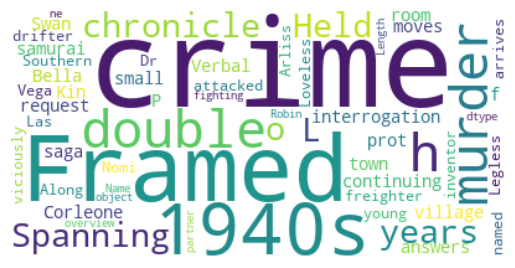

In [27]:
plt.imshow(overview_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
df_presupuesto_ganancia = df_final_usable[['movieId', 'title_y', 'budget', 'revenue', 'rating', 'release_date']]

# Cambiar el tipo de dato de las columnas budget y revenue a numerico
df_presupuesto_ganancia['budget'] = pd.to_numeric(df_presupuesto_ganancia['budget'], errors='coerce')
df_presupuesto_ganancia['revenue'] = pd.to_numeric(df_presupuesto_ganancia['revenue'], errors='coerce')

# Eliminar los que tengan presupuesto o ganancia igual a 0
df_presupuesto_ganancia.drop(df_presupuesto_ganancia[df_presupuesto_ganancia['budget'] == 0].index, inplace=True)
df_presupuesto_ganancia.drop(df_presupuesto_ganancia[df_presupuesto_ganancia['revenue'] == 0].index, inplace=True)

# Obtener el año de salida
df_presupuesto_ganancia['release_date'] = pd.to_datetime(df_presupuesto_ganancia['release_date'])
df_presupuesto_ganancia['release_date'] = df_presupuesto_ganancia['release_date'].dt.year

df_presupuesto_ganancia['release_decade'] = df_presupuesto_ganancia['release_date'] // 10 * 10

# Calculate the profit percentage
df_presupuesto_ganancia['profit_percentage'] = (df_presupuesto_ganancia['revenue'] - df_presupuesto_ganancia['budget']) / df_presupuesto_ganancia['budget'] * 100

df_presupuesto_ganancia.sort_values(by='release_date', ascending=True, axis=0, inplace=True)

fig = px.scatter(df_presupuesto_ganancia,
            x='budget',
            y='profit_percentage',
            size= 'rating',
            hover_name='title_y',
            title='Presupuesto vs Ganancia',
            animation_frame='release_decade',
            animation_group='title_y',
            range_x=[1, 400000000],
            range_y=[-100, 1000],
            log_x=True,
            labels={'budget': 'Presupuesto', 'profit_percentage': 'Porcentaje de Ganancia', 'title_y': 'Título', 'release_date': 'Año'},
)

fig.show()

# scatter Presupuesto vs ganancia (en bubble el rating)
# boxplot genero/rating

# sleeccionar genero
# año de estreno (input (daypicker))


C:\Users\mvill\AppData\Local\Temp\ipykernel_23120\223200157.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mvill\AppData\Local\Temp\ipykernel_23120\223200157.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mvill\AppData\Local\Temp\ipykernel_23120\223200157.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [29]:
app = Dash(__name__, external_stylesheets=[dbc.themes.LUX])
# mytitle = dcc.Markdown(children='')

In [30]:
barchart_votes_count = dcc.Graph(
    figure= px.bar(df_votes_count.head(10).sort_values(by='count', ascending=True),
    x='count',
    y='title',
    title='Top 10 Películas por numero de votos',
    labels={'title': 'Título', 'count': 'Número de votos'},
    orientation='h',
    range_x=[55000, 85000])
)

In [31]:
mapa = dcc.Graph(
    figure= px.choropleth(
    df_country_count,
    locations='production_countries',
    color='count',
    locationmode='country names',
    title='Cantidad de peliculas por pais',
    color_continuous_scale=px.colors.sequential.Plasma,
    )
)         

In [32]:
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([barchart_votes_count], width=6)
    ], justify = 'center'),
    dbc.Row([
        dbc.Col([mapa], width=6)
    ]),

], fluid=True)

In [33]:
# @app.callback(
#     Output(mygraph, 'figure')
# )

In [34]:
if __name__ == '__main__':
    app.run_server(port = 8050)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [13/Jun/2023 23:11:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2023 23:11:20] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2023 23:11:20] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [13/Jun/2023 23:11:20] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [13/Jun/2023 23:11:21] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
